<a href="https://colab.research.google.com/github/SagarGuttal/customer-checked-in-prediction/blob/main/Hotel_cistomer_checked_IN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1 :- Write a regex to extract all the numbers with orange color background from the below text in italics

Q :- {"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}

In [ ]:
import re

statement = """{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},
            {"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count():
             Parameter must be an array or an object that implements Countable (153)"}]}"""
pattern = "id..(\d{1,})|code..(\d{1})"

match_chat1 = re.findall(pattern, statement)

items_1 = []
items_2 = []
i=0
for item in match_chat1:
  items_1.append(item[0])
  items_2.append(item[1])

items_1 = [i for i in items_1 if i]
items_2 = [i for i in items_2 if i]
items_1.extend(items_2)
print(items_1)
  

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '648', '649', '650', '651', '652', '653', '3']


Part B:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Nextlab/train_data_evaluation_part_2.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Nextlab/test_data_evaluation_part2.csv")

In [ ]:
train_data.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
print("total records in train data :-",train_data.shape)
print("total records in test data :-",test_data.shape)

total records in train data :- (82580, 30)
total records in test data :- (1000, 30)


In [ ]:
train_data.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,82580.000000,82580.000000,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,...,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,41289.500000,41290.500000,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,...,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,23838.936952,23838.936952,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,...,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,0.000000,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20644.750000,20645.750000,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41289.500000,41290.500000,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61934.250000,61935.250000,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82579.000000,82580.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            82580 non-null  int64  
 1   ID                    82580 non-null  int64  
 2   Nationality           82580 non-null  object 
 3   Age                   78834 non-null  float64
 4   DaysSinceCreation     82580 non-null  int64  
 5   AverageLeadTime       82580 non-null  int64  
 6   LodgingRevenue        82580 non-null  float64
 7   OtherRevenue          82580 non-null  float64
 8   BookingsCanceled      82580 non-null  int64  
 9   BookingsNoShowed      82580 non-null  int64  
 10  BookingsCheckedIn     82580 non-null  int64  
 11  PersonsNights         82580 non-null  int64  
 12  RoomNights            82580 non-null  int64  
 13  DaysSinceLastStay     82580 non-null  int64  
 14  DaysSinceFirstStay    82580 non-null  int64  
 15  DistributionChannel

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [ ]:
train_data.drop(["Unnamed: 0", "ID","DaysSinceCreation"],inplace=True,axis=1)

In [ ]:
for column in train_data.columns:
    print("--"*20,column,"--"*20)
    print(train_data[column].unique())

---------------------------------------- Nationality ----------------------------------------
['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'CYP' 'ARG' 'ARM'
 'CHL' 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV'
 'JOR' 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE'
 'AND' 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT'
 'IDN' 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM'
 'BOL' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM' 'ECU' 'SYC' 'QAT' 'PRY' 'BRB'
 'OMN' 'TMP' 'ABW' 'LBN' 'AIA' 'SLV' 'DMA' 'CUB' 'VNM' 'GEO' 'IRQ' 'GAB'
 'PYF' 'LIE' 'SEN' 'BLR' 'ISL' 'DOM' 'GUY' 'LCA' 'ATA' 'NGA' 'RWA' 'CIV'
 'ALB' 'MKD' 'MNE' 'GTM' 'GHA' 'MDV' 'MCO' 'MUS' 'SYR' 'TGO' 'LKA' 'SUR'
 'KEN' 'MRT' 'HKG' 'CAF' 'NCL' 'STP' 'UZB' 'KIR' 'SDN' 'PRI' 'KNA' 'TJK'
 'SLE' 'LAO' 'COM' 'ETH' 'FRO'

In [ ]:
train_data.isnull().sum()

Nationality                0
Age                     3746
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [ ]:
train_data.isnull().sum()/len(train_data)

Nationality             0.000000
Age                     0.045362
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoom             0.000000
dtype: float64

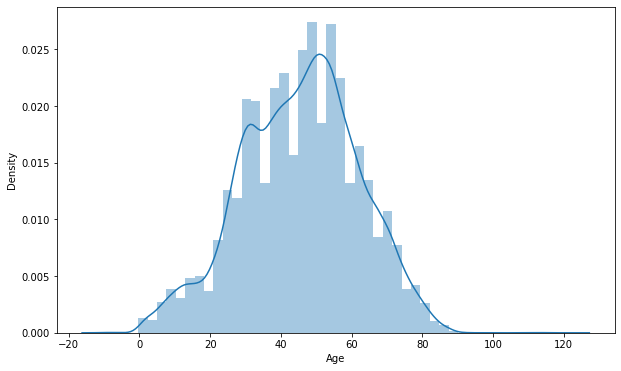

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(train_data["Age"])
plt.show()

In [ ]:
train_data.fillna(np.mean(train_data["Age"]),inplace=True,axis=1)

In [ ]:
train_data.isnull().sum()

Nationality             0
Age                     0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [ ]:
for column in train_data.columns:
    print("--"*20,column,"--"*20)
    print(train_data[column].unique())

---------------------------------------- Nationality ----------------------------------------
['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'CYP' 'ARG' 'ARM'
 'CHL' 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV'
 'JOR' 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE'
 'AND' 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT'
 'IDN' 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM'
 'BOL' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM' 'ECU' 'SYC' 'QAT' 'PRY' 'BRB'
 'OMN' 'TMP' 'ABW' 'LBN' 'AIA' 'SLV' 'DMA' 'CUB' 'VNM' 'GEO' 'IRQ' 'GAB'
 'PYF' 'LIE' 'SEN' 'BLR' 'ISL' 'DOM' 'GUY' 'LCA' 'ATA' 'NGA' 'RWA' 'CIV'
 'ALB' 'MKD' 'MNE' 'GTM' 'GHA' 'MDV' 'MCO' 'MUS' 'SYR' 'TGO' 'LKA' 'SUR'
 'KEN' 'MRT' 'HKG' 'CAF' 'NCL' 'STP' 'UZB' 'KIR' 'SDN' 'PRI' 'KNA' 'TJK'
 'SLE' 'LAO' 'COM' 'ETH' 'FRO'

In [ ]:
nationality_with_revenue = train_data[["Nationality","Age","LodgingRevenue"]].sort_values(by="LodgingRevenue",ascending=False)
nationality_with_revenue = nationality_with_revenue[:10]
nationality_with_revenue

,Nationality,Age,LodgingRevenue
2757,PRT,45.468554,21781.00
23964,USA,23.000000,9682.40
42497,DEU,51.000000,9665.66
38713,NAM,62.000000,9180.00
73417,GBR,55.000000,9010.00
2160,PRT,47.000000,8493.65
36463,DEU,59.000000,7902.00
13452,PRT,58.000000,7458.00
80018,AGO,53.000000,7256.00
54854,FRA,33.000000,7045.00


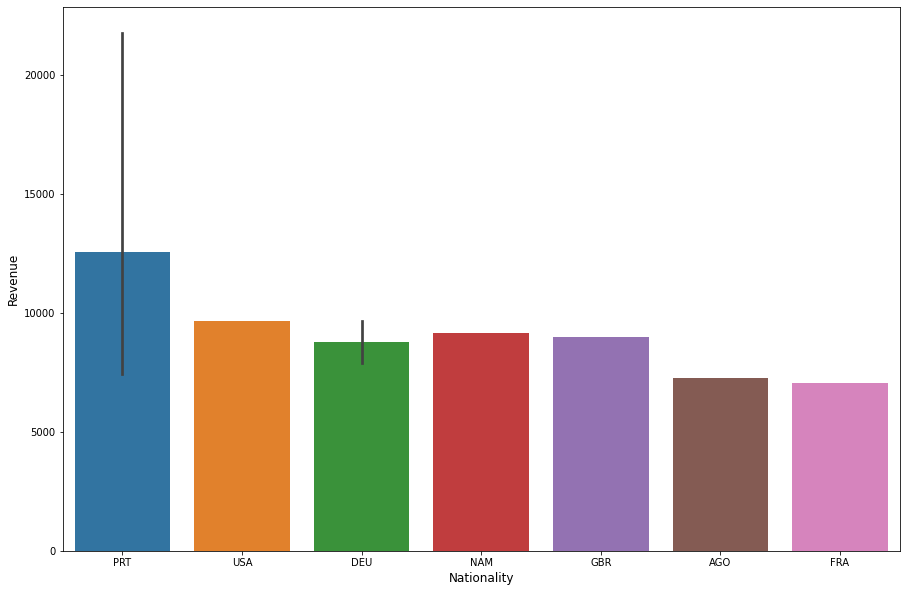

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Nationality",y="LodgingRevenue",data=nationality_with_revenue)
plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.show()

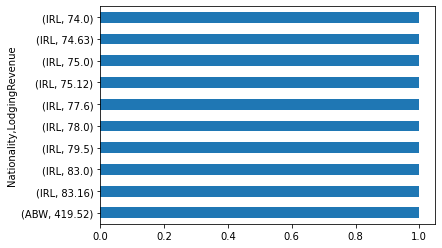

In [ ]:
Nationality_lodgeRevenue = train_data.groupby("Nationality")["LodgingRevenue"].value_counts().sort_values(ascending=True)
Nationality_lodgeRevenue= Nationality_lodgeRevenue[:10]
Nationality_lodgeRevenue.plot(kind="barh")

In [ ]:
AverageLeadTime_ = train_data[["AverageLeadTime","BookingsCheckedIn"]].sort_values(by="AverageLeadTime",ascending=False)
AverageLeadTime_checkedIn = AverageLeadTime_[AverageLeadTime_["BookingsCheckedIn"] == 1]
AverageLeadTime_checkedIn

,AverageLeadTime,BookingsCheckedIn
40460,588,1
40484,588,1
40486,588,1
40496,588,1
40499,588,1
...,...,...
62673,-1,1
72692,-1,1
29370,-1,1
58660,-1,1


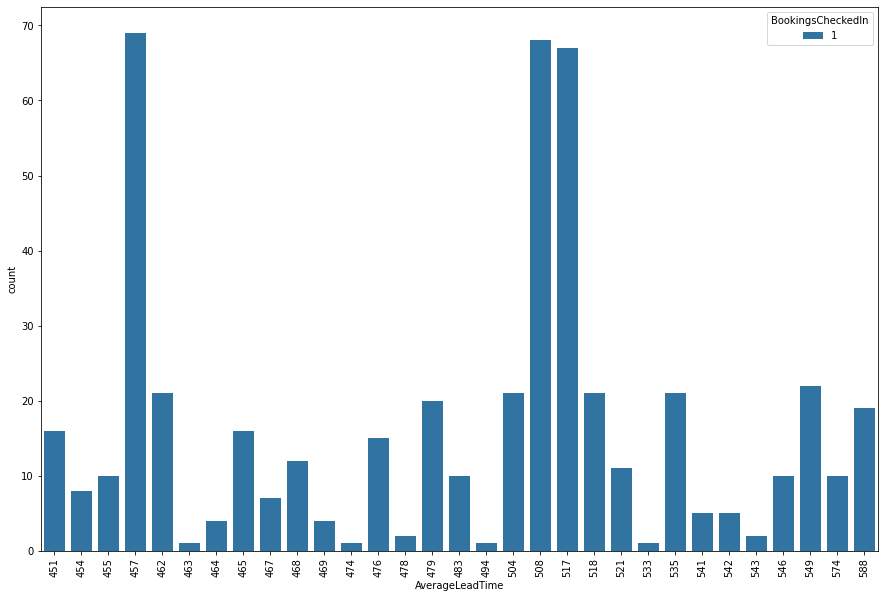

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="AverageLeadTime",hue="BookingsCheckedIn",data=AverageLeadTime_checkedIn[:500])
plt.xticks(rotation=90)
plt.show()

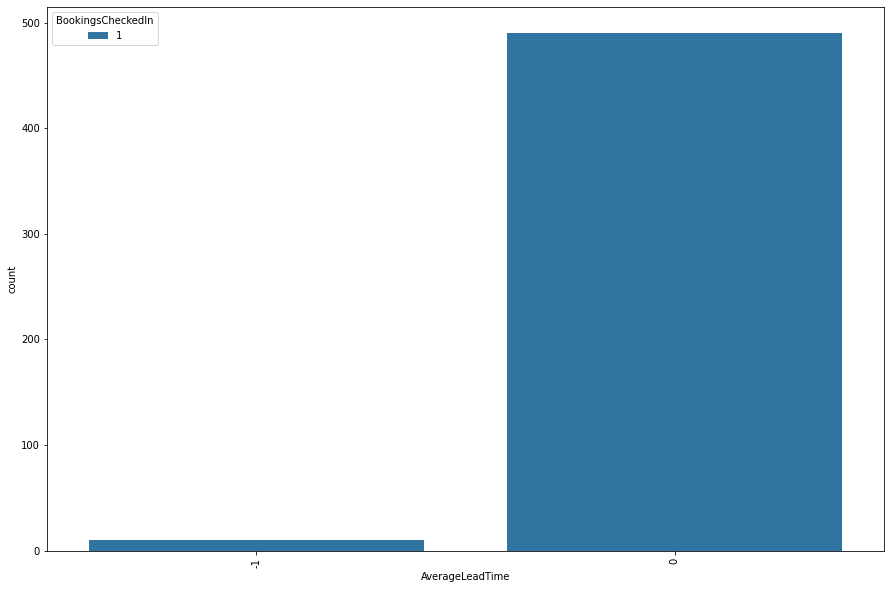

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="AverageLeadTime",hue="BookingsCheckedIn",data=AverageLeadTime_checkedIn[(61737-500):])
plt.xticks(rotation=90)
plt.show()

In [ ]:
AverageLeadTime = train_data[["AverageLeadTime","BookingsCheckedIn"]].sort_values(by="AverageLeadTime",ascending=False)
AverageLeadTime_notcheckedIn = AverageLeadTime_[AverageLeadTime_["BookingsCheckedIn"] == 0]
AverageLeadTime_notcheckedIn

,AverageLeadTime,BookingsCheckedIn
70599,0,0
69241,0,0
70621,0,0
69199,0,0
69201,0,0
...,...,...
62543,0,0
62541,0,0
62540,0,0
62538,0,0


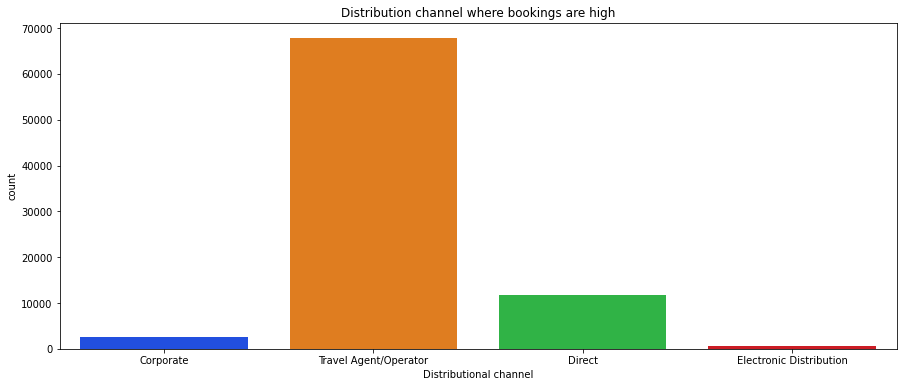

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=train_data,x="DistributionChannel",palette="bright")
plt.xlabel("Distributional channel",fontsize=10)
plt.ylabel("count",fontsize=10)
plt.title("Distribution channel where bookings are high")
plt.show()

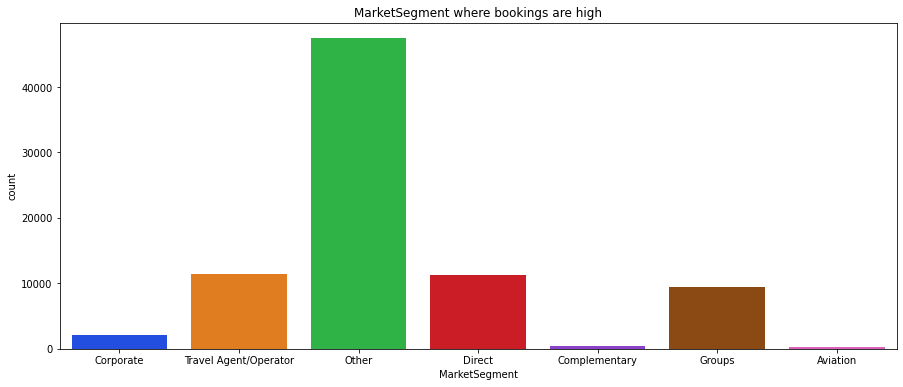

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=train_data,x="MarketSegment",palette="bright")
plt.xlabel("MarketSegment",fontsize=10)
plt.ylabel("count",fontsize=10)
plt.title("MarketSegment where bookings are high")
plt.show()

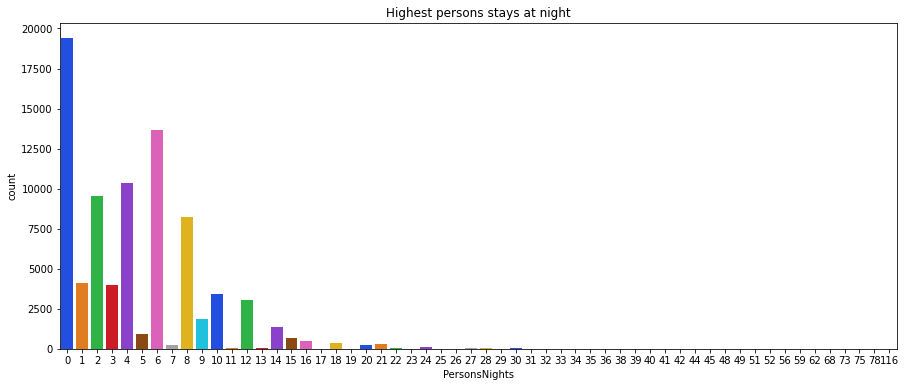

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=train_data,x="PersonsNights",palette="bright")
plt.xlabel("PersonsNights",fontsize=10)
plt.ylabel("count",fontsize=10)
plt.title("Highest persons stays at night")
plt.show()

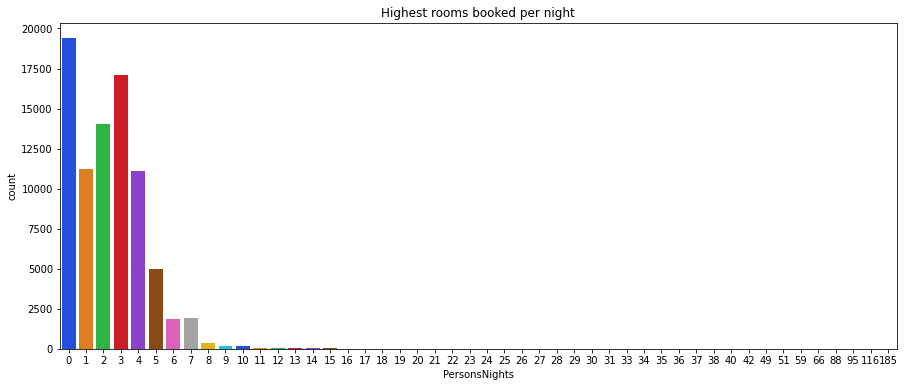

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=train_data,x="RoomNights",palette="bright")
plt.xlabel("PersonsNights",fontsize=10)
plt.ylabel("count",fontsize=10)
plt.title("Highest rooms booked per night")
plt.show()

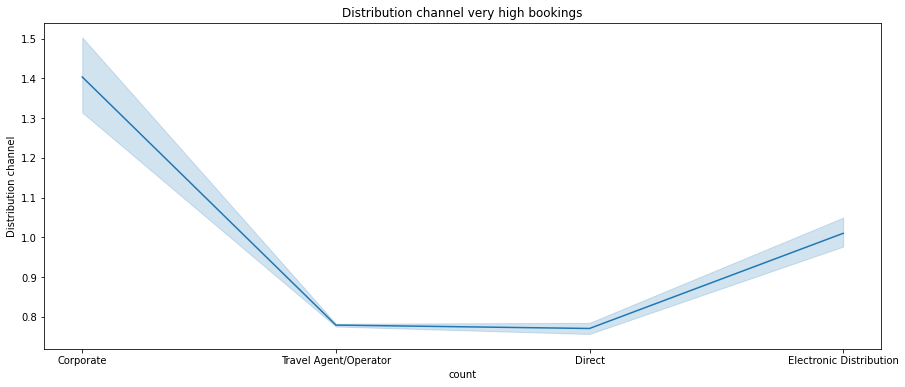

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=train_data,x="DistributionChannel",y="BookingsCheckedIn",palette="bright")
plt.xlabel("count",fontsize=10)
plt.ylabel("Distribution channel",fontsize=10)
plt.title("Distribution channel very high bookings")
plt.show()

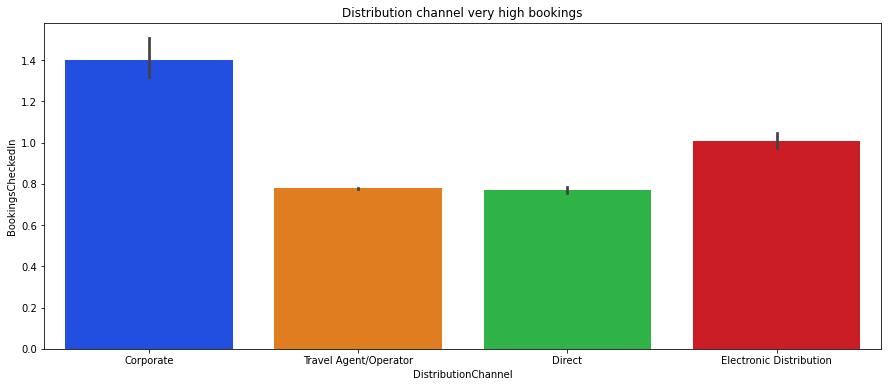

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=train_data,x="DistributionChannel",y=train_data["BookingsCheckedIn"],palette="bright")
plt.xlabel("DistributionChannel",fontsize=10)
plt.ylabel("BookingsCheckedIn",fontsize=10)
plt.title("Distribution channel very high bookings")
plt.show()

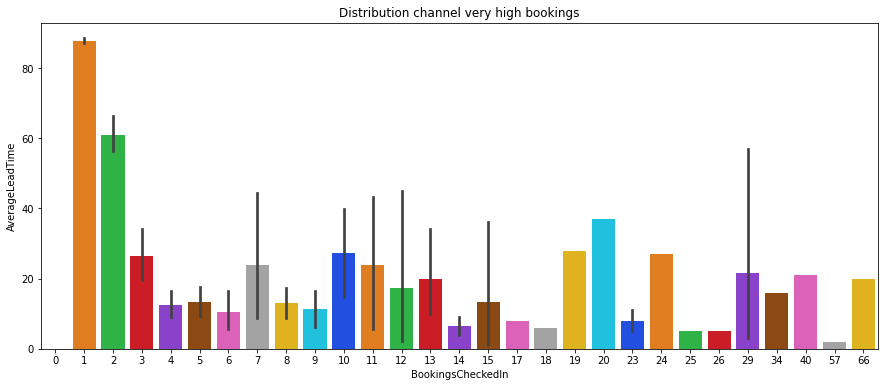

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=train_data,y="AverageLeadTime",x="BookingsCheckedIn",palette="bright")
plt.xlabel("BookingsCheckedIn",fontsize=10)
plt.ylabel("AverageLeadTime",fontsize=10)
plt.title("Distribution channel very high bookings")
plt.show()

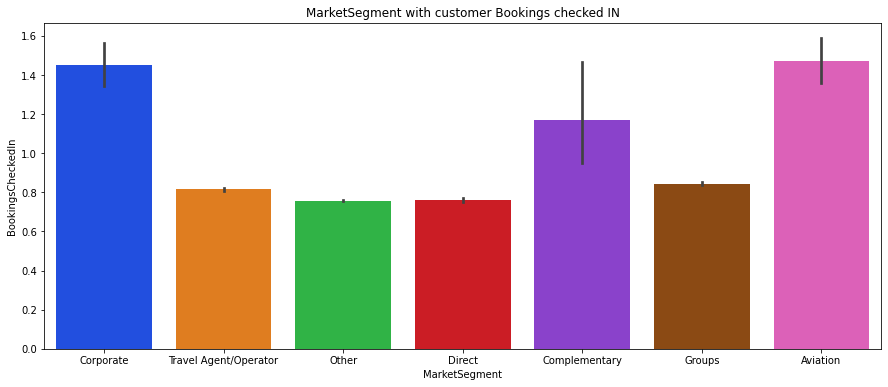

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=train_data,x="MarketSegment",y="BookingsCheckedIn",palette="bright")
plt.xlabel("MarketSegment",fontsize=10)
plt.ylabel("BookingsCheckedIn",fontsize=10)
plt.title("MarketSegment with customer Bookings checked IN")
plt.show()

In [ ]:
Nationality_bookings_checkedIN = train_data[["Nationality","BookingsCheckedIn"]].sort_values(by="BookingsCheckedIn",ascending=False)
Nationality_bookings_checkedIN = Nationality_bookings_checkedIN
Nationality_bookings_checkedIN

,Nationality,BookingsCheckedIn
2160,PRT,66
11480,PRT,57
12952,PRT,40
71771,PRT,34
3776,PRT,29
...,...,...
62199,DNK,0
62198,DNK,0
62196,DNK,0
62194,FRA,0


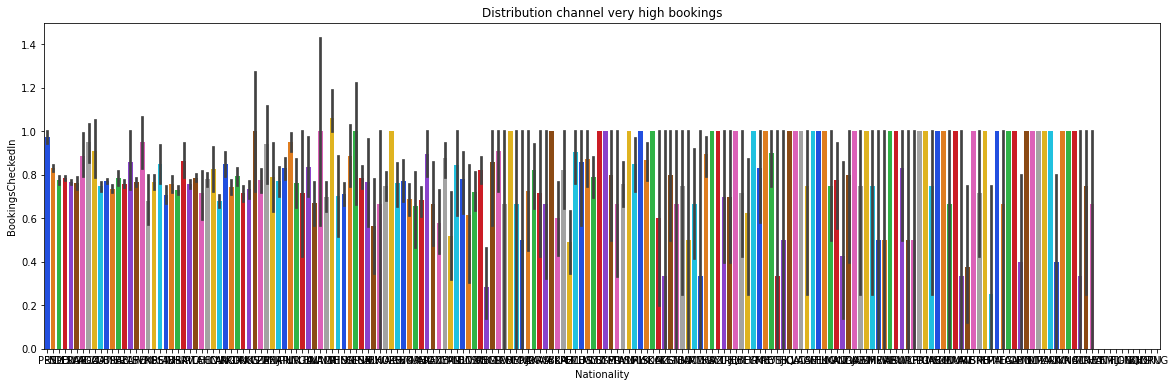

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=Nationality_bookings_checkedIN,x="Nationality",y="BookingsCheckedIn",palette="bright")
plt.xlabel("Nationality",fontsize=10)
plt.ylabel("BookingsCheckedIn",fontsize=10)
plt.title("Distribution channel very high bookings")
plt.show()

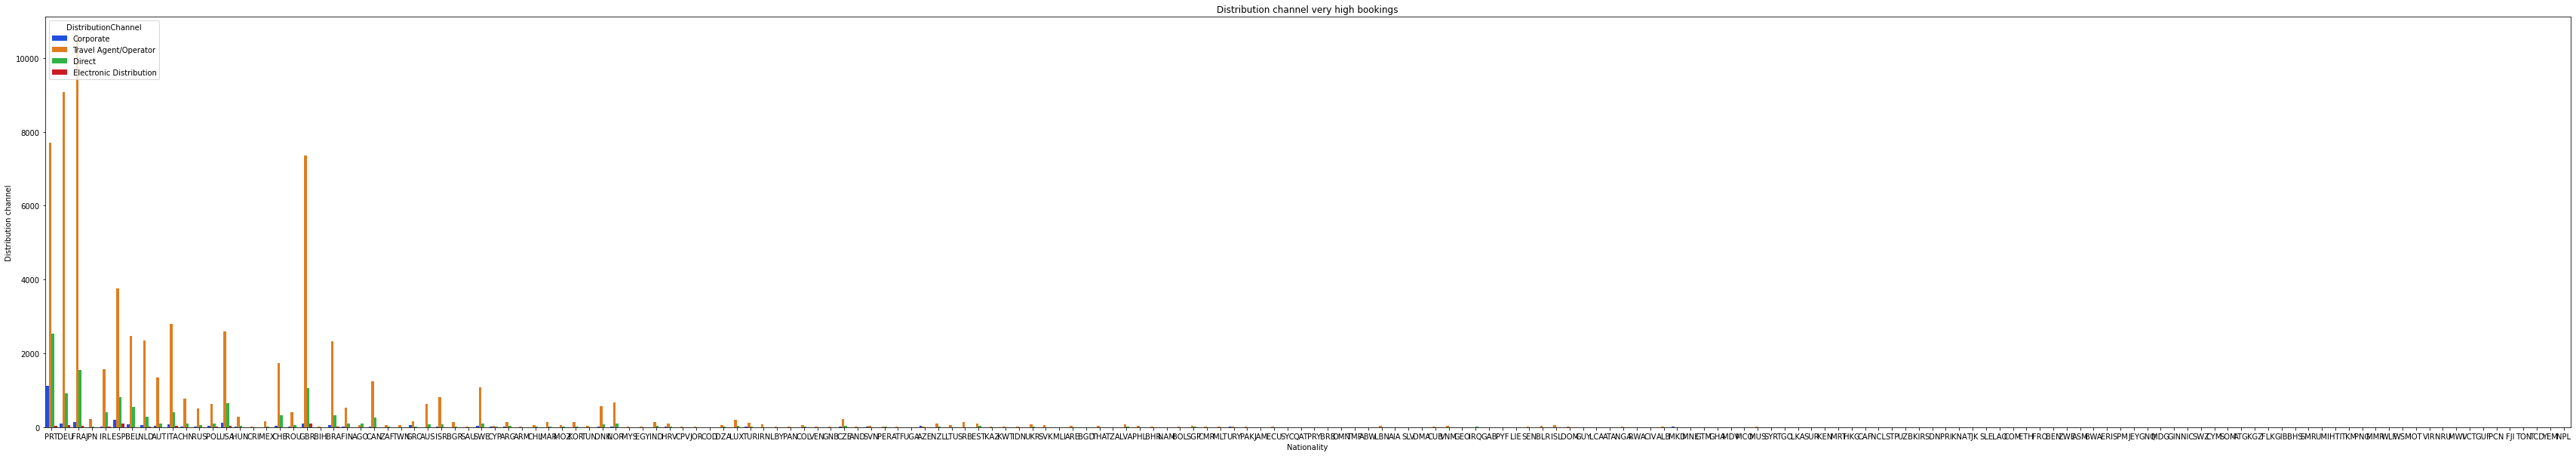

In [ ]:
plt.figure(figsize=(60,10))
sns.countplot(data=train_data,x="Nationality",hue="DistributionChannel",palette="bright")
plt.xlabel("Nationality",fontsize=10)
plt.ylabel("Distribution channel",fontsize=10)
plt.title("Distribution channel very high bookings")
plt.show()

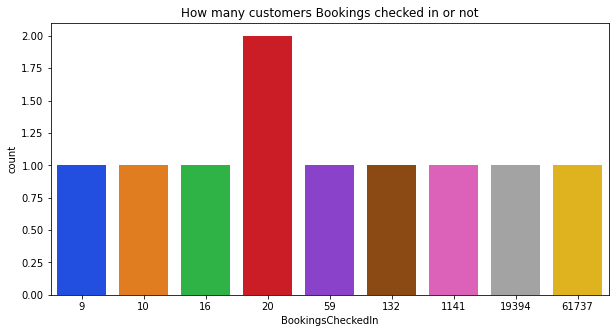

1     61737
0     19394
2      1141
3       132
4        59
5        20
6        20
7        16
8        10
9         9
10        7
11        6
12        4
13        4
29        3
15        3
23        2
14        2
25        1
17        1
66        1
26        1
57        1
40        1
18        1
24        1
19        1
20        1
34        1
Name: BookingsCheckedIn, dtype: int64


In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(train_data["BookingsCheckedIn"].value_counts()[:10],palette="bright")
plt.title("How many customers Bookings checked in or not")
plt.show()
print(train_data["BookingsCheckedIn"].value_counts())

In [ ]:
# Listing the columns
cols = train_data.columns
cols

Index(['Nationality', 'Age', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

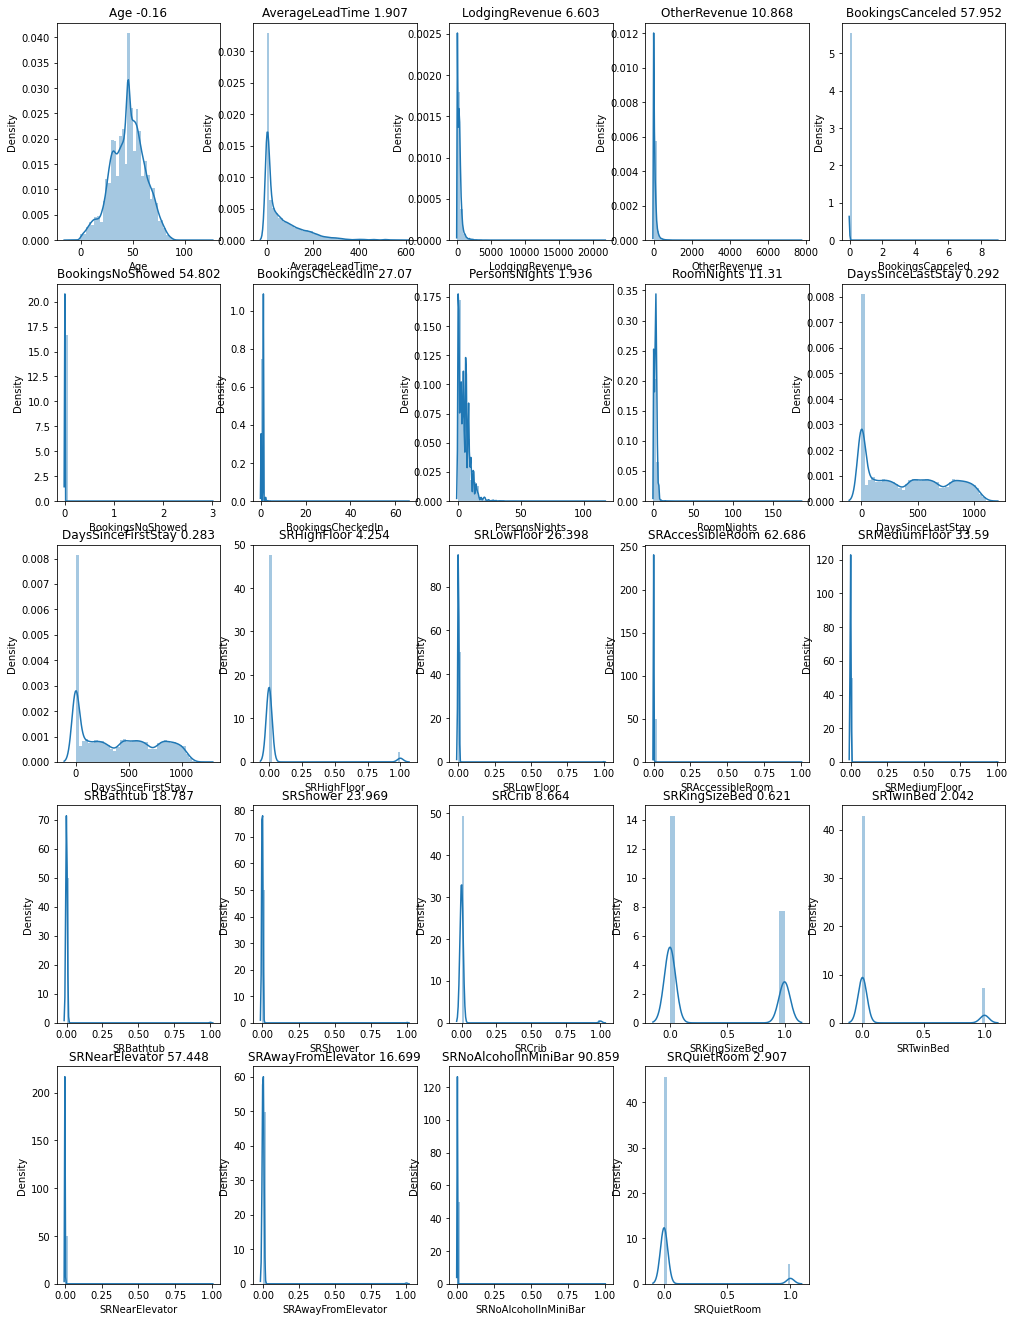

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols:
  if train_data[col].dtype != "object":    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(train_data[col])
    plt.title(col+' '+str(round(train_data[col].skew(),3)))

In [ ]:
train_data.columns

Index(['Nationality', 'Age', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

In [ ]:
train_data.drop(["Nationality"],axis=1, inplace = True)

In [ ]:
final_data = pd.get_dummies(train_data, drop_first = True)
final_data

,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,...,SRQuietRoom,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.000000,45,371.00,105.3,1,0,3,8,5,151,...,0,0,0,0,0,1,0,0,0,0
1,45.468554,61,280.00,53.0,0,0,1,10,5,1100,...,0,0,0,1,0,0,0,0,0,1
2,31.000000,0,0.00,0.0,0,0,0,0,0,-1,...,0,0,0,1,0,0,0,0,0,1
3,60.000000,93,240.00,60.0,0,0,1,10,5,1100,...,0,0,0,1,0,0,0,0,0,1
4,51.000000,0,0.00,0.0,0,0,0,0,0,-1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82575,51.000000,114,190.08,6.0,0,0,1,6,3,15,...,0,0,0,1,0,0,0,0,1,0
82576,50.000000,0,0.00,0.0,0,0,0,0,0,-1,...,0,0,0,1,0,0,0,0,1,0
82577,50.000000,18,222.00,255.0,0,0,1,3,3,15,...,0,0,0,1,0,0,0,0,1,0
82578,45.468554,11,255.00,9.0,0,0,1,3,3,15,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
correlation_each_col_bookingscheckedin=final_data.corr()["BookingsCheckedIn"].sort_values(ascending=False)
correlation_each_col_bookingscheckedin

BookingsCheckedIn                              1.000000
RoomNights                                     0.659022
PersonsNights                                  0.486211
BookingsCanceled                               0.464598
DaysSinceFirstStay                             0.425817
LodgingRevenue                                 0.420751
DaysSinceLastStay                              0.381401
OtherRevenue                                   0.300977
BookingsNoShowed                               0.286262
AverageLeadTime                                0.238262
MarketSegment_Corporate                        0.152353
Age                                            0.126506
MarketSegment_Complementary                    0.041107
DistributionChannel_Electronic Distribution    0.023871
MarketSegment_Groups                           0.023547
SRMediumFloor                                  0.010944
SRKingSizeBed                                  0.010867
MarketSegment_Travel Agent/Operator            0

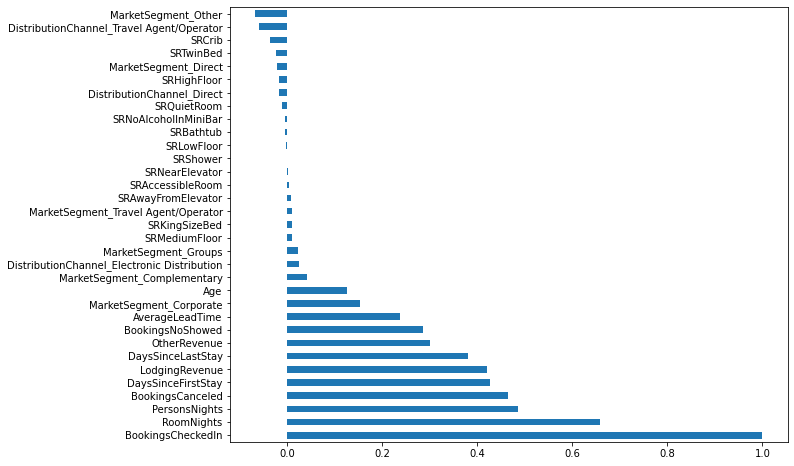

In [ ]:
plt.figure(figsize=(10,8))
correlation_each_col_bookingscheckedin.plot(kind="barh")

In [ ]:
corr_relation_df = final_data.corr()
top_features = corr_relation_df.index
top_features

Index(['Age', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'DistributionChannel_Direct',
       'DistributionChannel_Electronic Distribution',
       'DistributionChannel_Travel Agent/Operator',
       'MarketSegment_Complementary', 'MarketSegment_Corporate',
       'MarketSegment_Direct', 'MarketSegment_Groups', 'MarketSegment_Other',
       'MarketSegment_Travel Agent/Operator'],
      dtype='object')

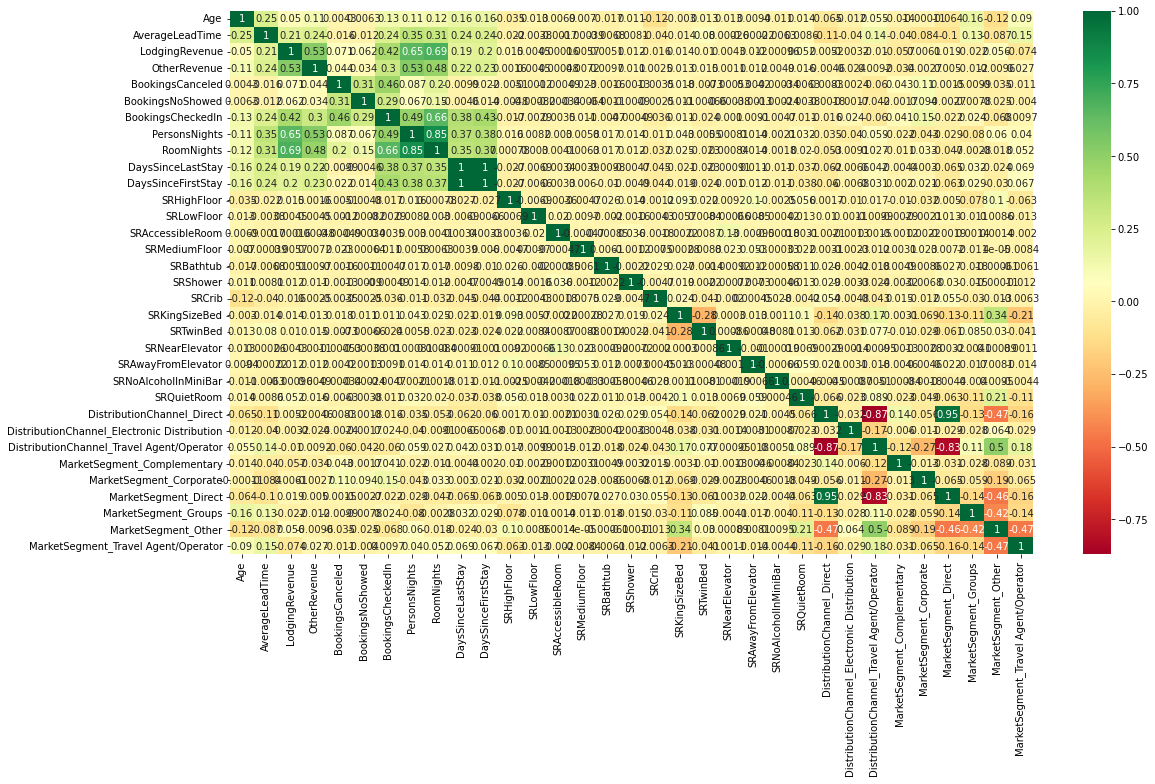

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(final_data[top_features].corr(),annot=True,fmt='.2g',cmap="RdYlGn")
plt.show()

In [ ]:
train_data.head()

,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,51.000000,45,371.0,105.3,1,0,3,8,5,151,...,0,0,0,0,0,0,0,0,0,0
1,45.468554,61,280.0,53.0,0,0,1,10,5,1100,...,0,0,0,0,0,0,0,0,0,0
2,31.000000,0,0.0,0.0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,60.000000,93,240.0,60.0,0,0,1,10,5,1100,...,0,0,0,0,0,0,0,0,0,0
4,51.000000,0,0.0,0.0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_data.columns

Index(['Age', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'DistributionChannel_Direct',
       'DistributionChannel_Electronic Distribution',
       'DistributionChannel_Travel Agent/Operator',
       'MarketSegment_Complementary', 'MarketSegment_Corporate',
       'MarketSegment_Direct', 'MarketSegment_Groups', 'MarketSegment_Other',
       'MarketSegment_Travel Agent/Operator'],
      dtype='object')

In [ ]:
selected_columns = ["RoomNights","PersonsNights","BookingsCanceled","DaysSinceFirstStay","LodgingRevenue","DaysSinceLastStay","OtherRevenue","BookingsNoShowed","AverageLeadTime",                                
"MarketSegment_Corporate","Age","MarketSegment_Complementary","DistributionChannel_Electronic Distribution","MarketSegment_Groups","SRMediumFloor","SRKingSizeBed","MarketSegment_Travel Agent/Operator",
"SRAwayFromElevator","SRAccessibleRoom","SRNearElevator"]                                 

In [ ]:
y = final_data["BookingsCheckedIn"]
x = final_data[selected_columns]

In [ ]:
x

,RoomNights,PersonsNights,BookingsCanceled,DaysSinceFirstStay,LodgingRevenue,DaysSinceLastStay,OtherRevenue,BookingsNoShowed,AverageLeadTime,MarketSegment_Corporate,Age,MarketSegment_Complementary,DistributionChannel_Electronic Distribution,MarketSegment_Groups,SRMediumFloor,SRKingSizeBed,MarketSegment_Travel Agent/Operator,SRAwayFromElevator,SRAccessibleRoom,SRNearElevator
0,5,8,1,1074,371.00,151,105.3,0,45,1,51.000000,0,0,0,0,0,0,0,0,0
1,5,10,0,1100,280.00,1100,53.0,0,61,0,45.468554,0,0,0,0,0,1,0,0,0
2,0,0,0,-1,0.00,-1,0.0,0,0,0,31.000000,0,0,0,0,0,1,0,0,0
3,5,10,0,1100,240.00,1100,60.0,0,93,0,60.000000,0,0,0,0,0,1,0,0,0
4,0,0,0,-1,0.00,-1,0.0,0,0,0,51.000000,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82575,3,6,0,15,190.08,15,6.0,0,114,0,51.000000,0,0,0,0,1,0,0,0,0
82576,0,0,0,-1,0.00,-1,0.0,0,0,0,50.000000,0,0,0,0,1,0,0,0,0
82577,3,3,0,15,222.00,15,255.0,0,18,0,50.000000,0,0,0,0,0,0,0,0,0
82578,3,3,0,15,255.00,15,9.0,0,11,0,45.468554,0,0,0,0,0,0,0,0,0


In [ ]:
x.columns

Index(['RoomNights', 'PersonsNights', 'BookingsCanceled', 'DaysSinceFirstStay',
       'LodgingRevenue', 'DaysSinceLastStay', 'OtherRevenue',
       'BookingsNoShowed', 'AverageLeadTime', 'MarketSegment_Corporate', 'Age',
       'MarketSegment_Complementary',
       'DistributionChannel_Electronic Distribution', 'MarketSegment_Groups',
       'SRMediumFloor', 'SRKingSizeBed', 'MarketSegment_Travel Agent/Operator',
       'SRAwayFromElevator', 'SRAccessibleRoom', 'SRNearElevator'],
      dtype='object')

In [ ]:
## Spliting  the dataset into Training and testing 
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
x_train

array([[-1.04413637, -1.02696399, -0.03201858, ..., -0.0610109 ,
        -0.01402917, -0.01604346],
       [-1.04413637, -1.02696399, -0.03201858, ..., -0.0610109 ,
        -0.01402917, -0.01604346],
       [-0.16461699, -0.14884061, -0.03201858, ..., -0.0610109 ,
        -0.01402917, -0.01604346],
       ...,
       [-0.60437668, -0.80743314, -0.03201858, ..., -0.0610109 ,
        -0.01402917, -0.01604346],
       [ 0.71490238,  0.72928277, -0.03201858, ..., -0.0610109 ,
        -0.01402917, -0.01604346],
       [-1.04413637, -1.02696399, -0.03201858, ..., -0.0610109 ,
        -0.01402917, -0.01604346]])

In [ ]:
x_test

array([[ 1.1460786 ,  0.08106145, -0.02335002, ..., -0.05398837,
        -0.02201394, -0.02201394],
       [-1.0161066 , -1.00793391, -0.02335002, ..., -0.05398837,
        -0.02201394, -0.02201394],
       [ 1.57851564,  1.60565496, -0.02335002, ..., -0.05398837,
        -0.02201394, -0.02201394],
       ...,
       [-1.0161066 , -1.00793391, -0.02335002, ..., -0.05398837,
        -0.02201394, -0.02201394],
       [ 0.71364156, -0.13673762, -0.02335002, ..., -0.05398837,
        -0.02201394, -0.02201394],
       [-1.0161066 , -1.00793391, -0.02335002, ..., -0.05398837,
        -0.02201394, -0.02201394]])

In [ ]:
print("shape of training sets :-",x_train.shape)
print("shape of testing sets :-",x_test.shape)

shape of training sets :- (66064, 20)
shape of testing sets :- (16516, 20)


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,  ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(20, input_shape=(20,), kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))
  
model.compile(optimizer='Adam',loss=tf.keras.losses.MeanSquaredError(),metrics=["accuracy"])  

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,)

In [ ]:
model_history = model.fit(x_train,y_train, epochs = 50, validation_split=0.33, batch_size=10, callbacks=early_stopping)

Epoch 1/50
4427/4427 [==============================] - 12s 3ms/step - loss: 0.2418 - accuracy: 0.9592 - val_loss: 0.0562 - val_accuracy: 0.9819
Epoch 2/50
4427/4427 [==============================] - 10s 2ms/step - loss: 0.1257 - accuracy: 0.9816 - val_loss: 0.1263 - val_accuracy: 0.9804
Epoch 3/50
4427/4427 [==============================] - 11s 3ms/step - loss: 0.1096 - accuracy: 0.9814 - val_loss: 0.0460 - val_accuracy: 0.9814
Epoch 4/50
4427/4427 [==============================] - 11s 2ms/step - loss: 0.0945 - accuracy: 0.9815 - val_loss: 0.0502 - val_accuracy: 0.9816
Epoch 5/50
4427/4427 [==============================] - 10s 2ms/step - loss: 0.0824 - accuracy: 0.9811 - val_loss: 0.0604 - val_accuracy: 0.9800
Epoch 6/50
4427/4427 [==============================] - 10s 2ms/step - loss: 0.0880 - accuracy: 0.9806 - val_loss: 0.0531 - val_accuracy: 0.9814
Epoch 7/50
4427/4427 [==============================] - 10s 2ms/step - loss: 0.0811 - accuracy: 0.9815 - val_loss: 0.0567 - val_ac

In [ ]:
model.evaluate(x_test,y_test)

517/517 [==============================] - 1s 2ms/step - loss: 0.1000 - accuracy: 0.9821


[0.09996899217367172, 0.982077956199646]

In [ ]:
selected_columns

['RoomNights',
 'PersonsNights',
 'BookingsCanceled',
 'DaysSinceFirstStay',
 'LodgingRevenue',
 'DaysSinceLastStay',
 'OtherRevenue',
 'BookingsNoShowed',
 'AverageLeadTime',
 'MarketSegment_Corporate',
 'Age',
 'MarketSegment_Complementary',
 'DistributionChannel_Electronic Distribution',
 'MarketSegment_Groups',
 'SRMediumFloor',
 'SRKingSizeBed',
 'MarketSegment_Travel Agent/Operator',
 'SRAwayFromElevator',
 'SRAccessibleRoom',
 'SRNearElevator']

In [ ]:
test_data

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,83585,83586,ITA,54.0,0,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,83586,83587,IRL,47.0,0,109,327.10,277.5,0,0,...,0,0,0,0,1,0,0,0,0,0
997,83587,83588,IRL,53.0,0,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
998,83588,83589,IRL,85.0,0,109,981.30,9.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_data.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [ ]:
test_data.isnull().sum()

Unnamed: 0               0
ID                       0
Nationality              0
Age                     33
DaysSinceCreation        0
AverageLeadTime          0
LodgingRevenue           0
OtherRevenue             0
BookingsCanceled         0
BookingsNoShowed         0
BookingsCheckedIn        0
PersonsNights            0
RoomNights               0
DaysSinceLastStay        0
DaysSinceFirstStay       0
DistributionChannel      0
MarketSegment            0
SRHighFloor              0
SRLowFloor               0
SRAccessibleRoom         0
SRMediumFloor            0
SRBathtub                0
SRShower                 0
SRCrib                   0
SRKingSizeBed            0
SRTwinBed                0
SRNearElevator           0
SRAwayFromElevator       0
SRNoAlcoholInMiniBar     0
SRQuietRoom              0
dtype: int64

In [ ]:
test_data.fillna(np.mean(test_data["Age"]),axis=1,inplace=True)

In [ ]:
test_data.isnull().sum()

Unnamed: 0              0
ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [ ]:
test_data.drop(["Unnamed: 0", "ID","DaysSinceCreation"],inplace=True,axis=1)

In [ ]:
test_data.drop(["Nationality"],axis=1, inplace = True)

In [ ]:
final_test_data = pd.get_dummies(test_data, drop_first = True)
final_test_data

,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,...,SRNoAlcoholInMiniBar,SRQuietRoom,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,47.000000,0,0.00,0.0,0,0,0,0,0,-1,...,0,0,0,0,1,0,0,0,1,0
1,16.000000,130,483.48,155.1,0,0,1,15,5,16,...,0,0,0,0,1,0,0,0,1,0
2,15.000000,0,0.00,0.0,0,0,0,0,0,-1,...,0,0,0,0,1,0,0,0,1,0
3,12.000000,0,0.00,0.0,0,0,0,0,0,-1,...,0,0,0,0,1,0,0,0,1,0
4,39.720786,0,0.00,0.0,0,0,0,0,0,-1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,54.000000,0,0.00,0.0,0,0,0,0,0,-1,...,0,0,0,0,1,0,0,0,1,0
996,47.000000,109,327.10,277.5,0,0,1,6,3,3,...,0,0,0,0,1,0,0,0,1,0
997,53.000000,0,0.00,0.0,0,0,0,0,0,-1,...,0,0,0,0,1,0,0,0,1,0
998,85.000000,109,981.30,9.0,0,0,1,6,3,3,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
col=x.columns

In [ ]:
final_test_data.columns

Index(['Age', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'DistributionChannel_Direct',
       'DistributionChannel_Electronic Distribution',
       'DistributionChannel_Travel Agent/Operator',
       'MarketSegment_Complementary', 'MarketSegment_Corporate',
       'MarketSegment_Direct', 'MarketSegment_Other',
       'MarketSegment_Travel Agent/Operator'],
      dtype='object')

In [ ]:
final_test_data.rename(columns = {'MarketSegment_Other':'MarketSegment_Groups'}, inplace = True)

In [ ]:
y_testing = final_test_data["BookingsCheckedIn"]
x_testing = final_test_data[selected_columns]

In [ ]:
x_testing.shape

(1000, 20)

In [ ]:
y_testing.shape

(1000,)

In [ ]:
sc=StandardScaler()
x_testing_scaled =sc.fit_transform(x_testing)

In [ ]:
model.evaluate(x_testing_scaled,y_testing)

32/32 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.4860


[0.35392460227012634, 0.4860000014305115]

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

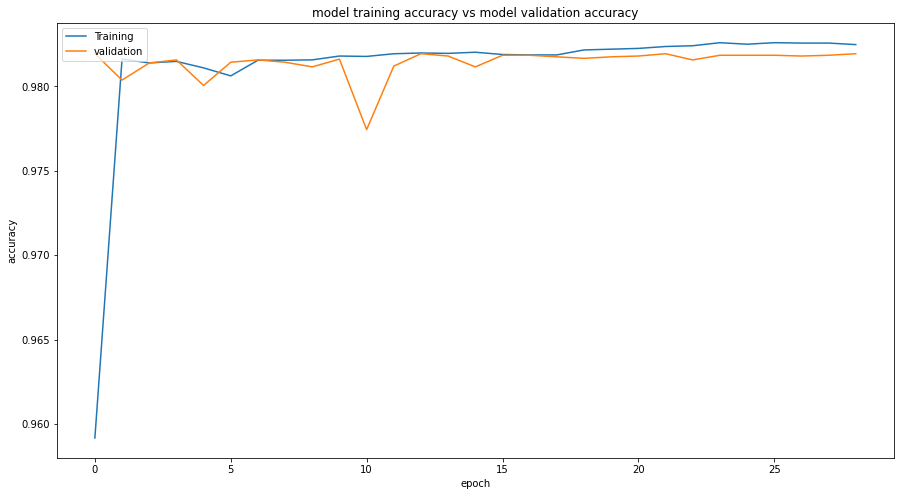

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model training accuracy vs model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'validation'], loc='upper left')
plt.show()

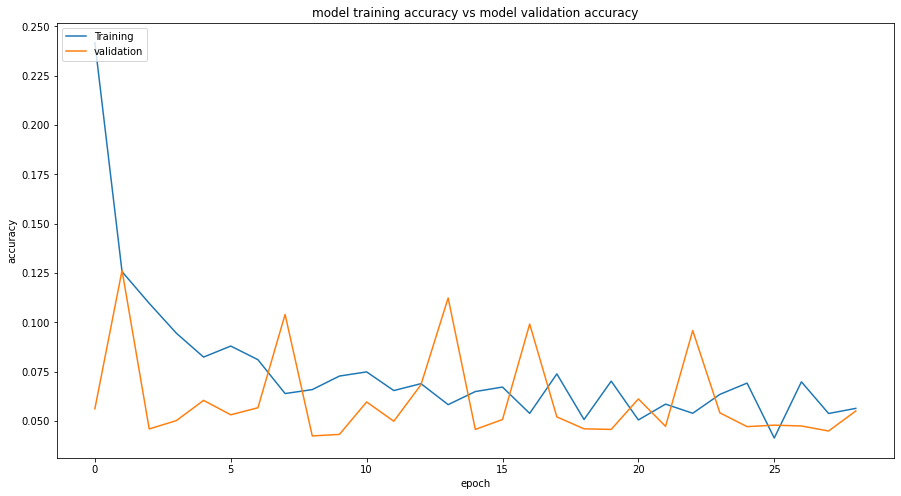

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model training accuracy vs model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'validation'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
final_mse = mean_squared_error(y_test, predictions)
final_mse

0.0999689913152939

In [ ]:
from tensorflow.keras.models import save_model
save_model(model, "/content/drive/MyDrive/Nextlab/model.h5")

## Challenges i faced during this project :-
* Data information is not understanding i faced this because of i didnt understand some columns what they actually specifying like example in this dataset directly given 0,1 numarically values i didnt understand that
* In this project there are lot of columns, I selected columns where columns are positively co-related and using co-relation plot taken 20 columns for this project
* After training the neural network when i tested for tesing dataset accuracy was droped due to bias in training phase. 
